<h2><b>Market Research and Recommendation and Visualization Technique for Business Decision Making</b></h3>

<p>
<b>About The Company</b> 
<br>
DQLab sport center adalah toko yang menjual berbagai kebutuhan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini mulai berjualan sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini.
Di awal tahun 2019, manajer toko tersebut merekrut junior DA untuk membantu memecahkan masalah yang ada di tokonya, yaitu menurunnya pelanggan yang membeli kembali ke tokonya. Junior DA tersebut pun diberi kepercayaan mengolah data transaksi toko tersebut. Manajer toko mendefinisikan bahwa customer termasuk sudah bukan disebut pelanggan lagi (churn) ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia.

<b>Scenario</b> <br>
Lakukan penelitian churn analysis terhadap produk di salah satu cabang kita. Harapan saya adalah kamu bisa memberikan rekomendasi dan strategi untuk menurunkan churn dari pelanggan. Manajer toko pun memberikan data transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (comma separated value) dengan data_retail.csv dengan jumlah baris 100.000 baris data.

<b>List Columns</b>
<ul>
    <li>No</li>
    <li>Row_Num</li>
    <li>Customer_ID</li>
    <li>Product</li>
    <li>First_Transaction</li>
    <li>Last_Transaction</li>
    <li>Average_Transaction_Amount</li>
    <li>Count_Transaction</li>
</ul>
</p>

In [1]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

# inspect first 5 data
print(df.head())

# dataset info
df.info()

   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no       

In [2]:
# before jump into cleaning data, i want to transform all name column to lower case. it's much easier to write and read

df= df.rename(columns=str.lower)

# remove no and row_num column cause is no needed for analysis
df = df.drop(['no', 'row_num'], axis= 1) 


df.head()

,customer_id,product,first_transaction,last_transaction,average_transaction_amount,count_transaction
0,29531,Jaket,1466304274396,1538718482608,1467681,22
1,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,141526,Tas,1493349147000,1548322802000,310915,30
3,141526,Jaket,1493362372547,1547643603911,722632,27
4,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [3]:
# change data type firs and last transaction to datetime

# Kolom First_Transaction
df['first_transaction'] = pd.to_datetime(df['first_transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['last_transaction'] = pd.to_datetime(df['last_transaction']/1000, unit='s', origin='1970-01-01')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   customer_id                 100000 non-null  int64         
 1   product                     100000 non-null  object        
 2   first_transaction           100000 non-null  datetime64[ns]
 3   last_transaction            100000 non-null  datetime64[ns]
 4   average_transaction_amount  100000 non-null  int64         
 5   count_transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 4.6+ MB


In [15]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['last_transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
# df.loc[df['last_transaction'] <= '2018-08-01', 'is_churn'] = True
# df.loc[df['last_transaction'] > '2018-08-01', 'is_churn'] = False

# other option
df['is_churn'] = np.where(df['last_transaction'] <= '2018-08-01', 'churn', 'not_churn')

print('Lima data teratas:')
df.head()

2019-02-01 23:57:57.286000128
Lima data teratas:


,customer_id,product,first_transaction,last_transaction,average_transaction_amount,count_transaction,is_churn,year_first_transaction,year_last_transaction,count_transaction_group,avg_trans_amount_group,year_diff
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,not_churn,2016,2018,5. > 10,5. >1.000.000 - 2.500.000,2
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,not_churn,2014,2018,5. > 10,5. >1.000.000 - 2.500.000,4
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,not_churn,2017,2019,5. > 10,2. >250.000 - 500.000,2
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,not_churn,2017,2019,5. > 10,3. >500.000 - 750.000,2
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,not_churn,2015,2018,5. > 10,5. >1.000.000 - 2.500.000,3


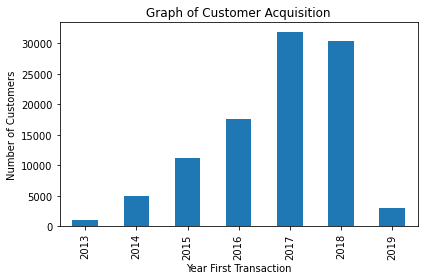

In [5]:
# create new column first and last year transaction
# Kolom tahun transaksi pertama
df['year_first_transaction'] = df['first_transaction'].dt.year
# Kolom tahun transaksi terakhir
df['year_last_transaction'] = df['last_transaction'].dt.year


# create visualization of count customer by year 
df_year = df.groupby(['year_first_transaction'])['customer_id'].count()
df_year.plot(x='year_first_transaction', y='customer_id', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year First Transaction')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

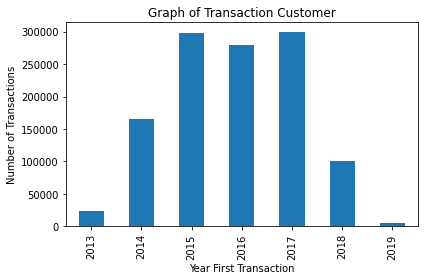

In [6]:
# visualization of count transaction by year
plt.clf()
df_year = df.groupby(['year_first_transaction'])['count_transaction'].sum()
df_year.plot(x='year_first_transaction', y='count_transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year First Transaction')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

<ipython-input-7-5989c7a12d65>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(data = df.groupby(['product', 'year_first_transaction']).mean().reset_index(),


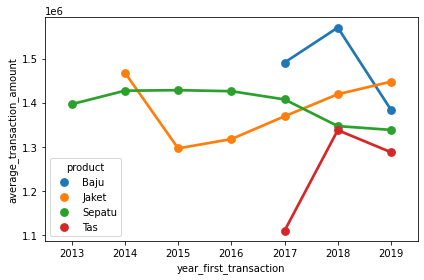

In [7]:
# visualization of average_transaction_amount by year and product
plt.clf()
sns.pointplot(data = df.groupby(['product', 'year_first_transaction']).mean().reset_index(),
x='year_first_transaction',
y='average_transaction_amount',
hue='product')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

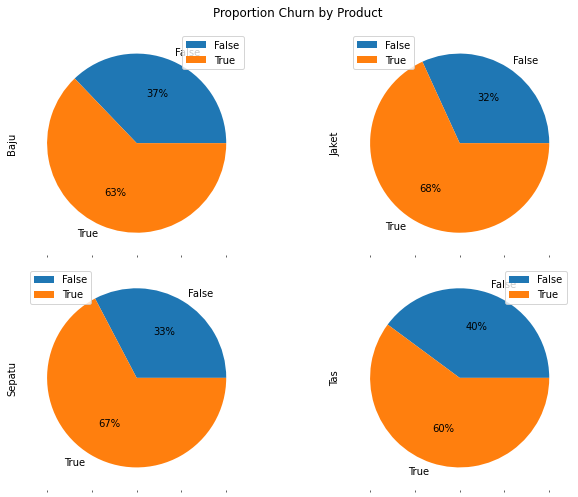

In [8]:
# visualization of is churn percentage by product
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn',
						columns='product',
						values='customer_id',
						aggfunc='count',
						fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

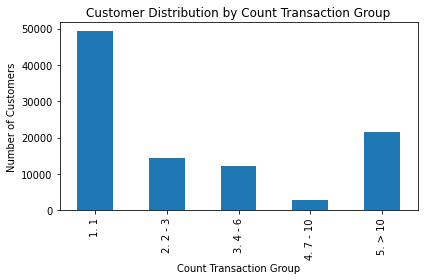

In [9]:
# visualization of distribution customer by treansaction group
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['count_transaction'] == 1:
        val = '1. 1'
    elif (row['count_transaction'] > 1 and row['count_transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['count_transaction'] > 3 and row['count_transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['count_transaction'] > 6 and row['count_transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. > 10'
    return val
# Tambahkan kolom baru
df['count_transaction_group'] = df.apply(func, axis=1)

df_year = df.groupby(['count_transaction_group'])['customer_id'].count()
df_year.plot(x='count_transaction_group', y='customer_id', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count Transaction Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

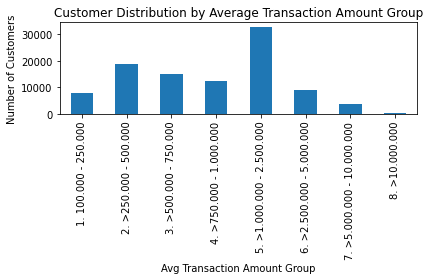

In [10]:
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['average_transaction_amount'] >= 100000 and row['average_transaction_amount'] <= 250000):
        val ='1. 100.000 - 250.000'
    elif (row['average_transaction_amount'] > 250000 and row['average_transaction_amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['average_transaction_amount'] > 500000 and row['average_transaction_amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['average_transaction_amount'] > 750000 and row['average_transaction_amount'] <= 1000000):
        val='4. >750.000 - 1.000.000'
    elif (row['average_transaction_amount'] > 1000000 and row['average_transaction_amount'] <= 2500000):
        val='5. >1.000.000 - 2.500.000'
    elif (row['average_transaction_amount'] > 2500000 and row['average_transaction_amount'] <= 5000000):
        val='6. >2.500.000 - 5.000.000'
    elif (row['average_transaction_amount'] > 5000000 and row['average_transaction_amount'] <= 10000000):
        val='7. >5.000.000 - 10.000.000'
    else:
        val='8. >10.000.000'
    return val
# Tambahkan kolom baru
df['avg_trans_amount_group'] = df.apply(f, axis=1)

df_year = df.groupby(['avg_trans_amount_group'])['customer_id'].count()
df_year.plot(x='avg_trans_amount_group', y='customer_id', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Avg Transaction Amount Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [11]:
# set feature and target for analyze model

# Feature column: Year_Diff
df['year_diff'] = df['year_last_transaction'] - df['year_first_transaction']

# Nama-nama feature columns
feature_columns = ['average_transaction_amount', 'count_transaction', 'year_diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

In [12]:
# split into data train 7.5 and data test 2.5

# import module
from sklearn.model_selection import train_test_split

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 0)

In [17]:
# test with using logistic regression (it because the target is non-numerik)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 432x288 with 0 Axes>

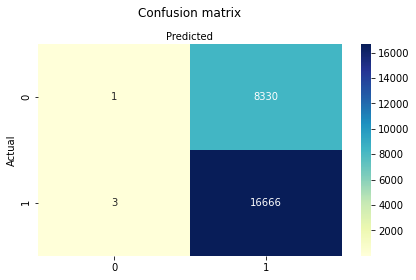

In [18]:
# visualize the confusion matrix
plt.clf()
# name  of classes
class_names = ['churn', 'not_churn'] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [19]:
# find the Accuracy, Precision, dan Recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
